In [1]:
import os, sys
import importlib

from utils import load, vis, models, models_LSTM, process

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
importlib.reload(vis)

data_folder = "data/simplified/"
access_file_generator = map(lambda x : data_folder + x + '.csv', load.classes)
trainGenerator = vis.ImageGenerator(access_file_generator)

In [3]:
gen = trainGenerator.generateImages()

X.shape: (128, 450, 450, 4)
y.shape: (128, 8)


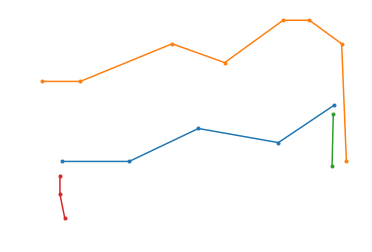

In [4]:
%matplotlib inline
X, y = next(gen)
print('X.shape:', X.shape)
print('y.shape:', y.shape)

array([0., 0., 0., 0., 0., 0., 0., 1.])

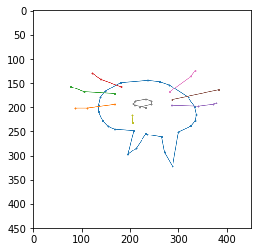

In [7]:
import matplotlib.pyplot as plt
plt.imshow(X[0].astype(int))
y[0]

# Building PyTorch CNN Model

In [8]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(4, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [9]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

AttributeError: 'numpy.ndarray' object has no attribute 'dim'

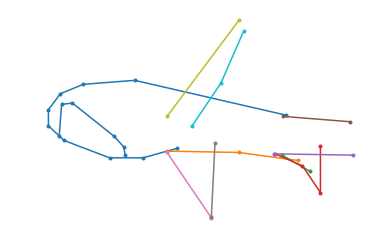

In [10]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(gen, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

# Building Keras CNN Model

In [ ]:
importlib.reload(models)

model = models.DoodleConv1((*trainGenerator.dim,4), trainGenerator.n_classes)
model.compile(optimizer='adam', loss='categorical_crossentropy')
model.summary()

In [ ]:
model.fit_generator(generator=gen, epochs=5, steps_per_epoch=5)

In [ ]:
data = process.SeqGenerator(access_file_generator)
gen2 = data.generateSeq()

In [ ]:
importlib.reload(models_LSTM)

model2 = models_LSTM.DoodleLSTM((None,3), data.n_classes)
model2.compile(optimizer = 'adam', loss = 'categorical_crossentropy')
model2.summary()

In [ ]:
model2.fit_generator(generator=gen2, epochs=100, steps_per_epoch=5)